* [1. Loading Data](#1) <br>
* [2.Spliting Data as Train and Validation](#2) <br>
* [3.Creating Train Dataset from Train split](#3) <br>
* [4.Normalization / Feature Scaling](#4) <br>
* [5.Creating X_train and y_train from Train data](#5) <br>
* [6.Creating Simple RNN model](#6) <br>
* [7.Evaluating Model](#7) <br>
* [8.Creating Test Dataset from Validation Data](#8) <br>
* [9.Evaluating with Validation Data](#9) <br>
* [10.Creating LSTM model](#10) <br>
* [11.Evaluating LSTM model](#11) <br>
* [12.Future price prediction](#12) <br>


link download: https://www.nasdaq.com/market-activity/stocks/tsla/historical?page=1&rows_per_page=10&timeline=y10https://www.nasdaq.com/market-activity/stocks/tsla/historical?page=1&rows_per_page=10&timeline=y10

<a id="1"></a>
## 1.Loading Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv
/kaggle/input/tesla2014-2024/Tesla2014_2024.csv


In [14]:
data = pd.read_csv("/kaggle/input/tesla2014-2024/Tesla2014_2024.csv")

In [16]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,6/27/2014,$15.94,84457128,$15.65,$16.00,$15.63
1,6/30/2014,$16.00,72411399,$15.97,$16.30,$15.93
2,7/1/2014,$15.98,65033547,$16.16,$16.23,$15.91
3,7/2/2014,$15.30,120350340,$16.04,$16.16,$15.14
4,7/3/2014,$15.28,77500701,$15.42,$15.46,$14.93


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


## Preprocessing data


In [18]:
# Chuyển đổi các cột có dấu $ thành float
columns_to_convert = ['Close/Last', 'Open', 'High', 'Low']

for column in columns_to_convert:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

In [19]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,6/27/2014,15.94,84457128,15.65,16.00,15.63
1,6/30/2014,16.00,72411399,15.97,16.30,15.93
2,7/1/2014,15.98,65033547,16.16,16.23,15.91
3,7/2/2014,15.30,120350340,16.04,16.16,15.14
4,7/3/2014,15.28,77500701,15.42,15.46,14.93


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Volume      2516 non-null   int64  
 3   Open        2516 non-null   float64
 4   High        2516 non-null   float64
 5   Low         2516 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


<a id="2"></a>
## 2.Spliting Data as Train and Validation

In [21]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2516
Train data length : 1761
Validation data lenth : 755


In [22]:
train_data = data[:length_train].iloc[:, [0, 3]] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2014-06-27,15.65
1,2014-06-30,15.97
2,2014-07-01,16.16
3,2014-07-02,16.04
4,2014-07-03,15.42
...,...,...
1756,2021-06-18,204.46
1757,2021-06-21,208.16
1758,2021-06-22,206.08
1759,2021-06-23,210.67


In [23]:
validation_data = data[length_train:].iloc[:,[0,3]]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1761,2021-06-25,229.86
1762,2021-06-28,223.88
1763,2021-06-29,228.22
1764,2021-06-30,226.59
1765,2021-07-01,227.97
...,...,...
2511,2024-06-20,184.68
2512,2024-06-21,182.30
2513,2024-06-24,184.97
2514,2024-06-25,184.40


<a id="3"></a>
## 3.Creating Train Dataset from Train split

* We will get Open column as our dataset
* Dataset to be converted to array by adding `.values`

In [24]:
dataset_train = train_data.Open.values
dataset_train.shape

(1761,)

In [25]:
train_data.Open.values

array([ 15.65,  15.97,  16.16, ..., 206.08, 210.67, 225.  ])

In [26]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1761, 1)

In [27]:
dataset_train

array([[ 15.65],
       [ 15.97],
       [ 16.16],
       ...,
       [206.08],
       [210.67],
       [225.  ]])

#### <a id="4"></a>
## 4.Normalization / Feature Scaling

* Dataset values will be in between 0 and 1 after scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1761, 1)

In [30]:
dataset_train_scaled[:5]

array([[0.02141566],
       [0.02252816],
       [0.02318871],
       [0.02277152],
       [0.02061605]])

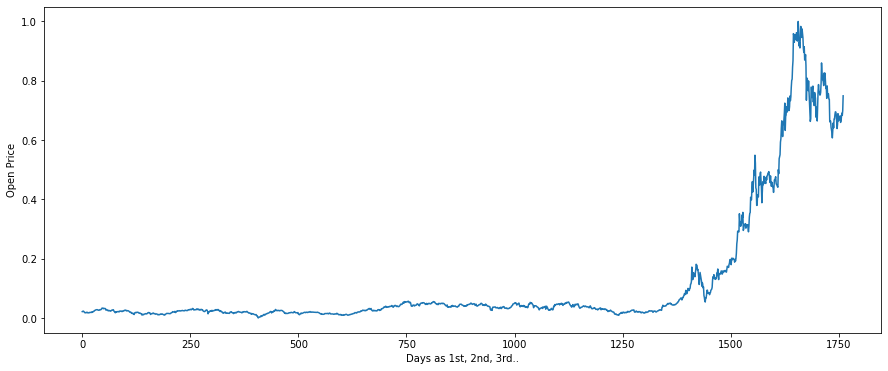

In [29]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

<a id="5"></a>
## 5.Creating X_train and y_train from Train data

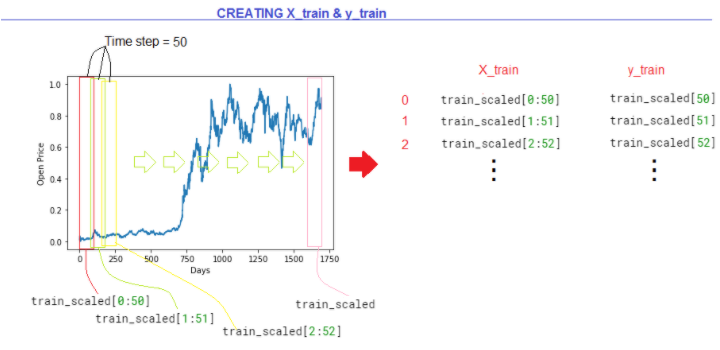

* We have train data composed of stock open prices over days
* So, it has 1761 prices corresponding 1761 days
* My aim is to predict the open price of the next day.
* I can use a time step of 50 days.
* I will pick first 50 open prices (0 to 50), 1st 50 price will be in X_train data
* Then predict the price of 51th day; and 51th price will be in y_train data
* Again, i will pick prices from 1 to 51, those will be in X_train data
* Then predict the next days price, 52nd price will be in y_train data

In [32]:
length_train

1761

In [33]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)


In [34]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1711, 50)
Shape of y_train before reshape : (1711,)


## Reshape

In [35]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1711, 50, 1)
Shape of y_train after reshape : (1711, 1)


* Shape of X_train : 1711 x 50 x 1
* That means we have 1711 rows, each row has 50 rows and 1 column
* Lets check the first row: it has 50 rows (open prices of 49 days)

In [36]:
X_train[0]

array([[0.02141566],
       [0.02252816],
       [0.02318871],
       [0.02277152],
       [0.02061605],
       [0.01974691],
       [0.01769573],
       [0.01828675],
       [0.01734807],
       [0.01814768],
       [0.01800862],
       [0.01957308],
       [0.01842581],
       [0.01710471],
       [0.01706995],
       [0.01734807],
       [0.01849534],
       [0.01800862],
       [0.0187387 ],
       [0.0186344 ],
       [0.01898206],
       [0.01953831],
       [0.01842581],
       [0.02012933],
       [0.01939925],
       [0.02134613],
       [0.02204144],
       [0.0223891 ],
       [0.02496176],
       [0.02520512],
       [0.02621332],
       [0.0268391 ],
       [0.02774301],
       [0.02784731],
       [0.02760395],
       [0.02802114],
       [0.02701293],
       [0.02603949],
       [0.02645668],
       [0.02600473],
       [0.0268391 ],
       [0.02843833],
       [0.02809067],
       [0.02770825],
       [0.0292727 ],
       [0.03087192],
       [0.03368794],
       [0.032

* Check the first item in y_train
* It is the price of 50th day

In [37]:
y_train[0]

array([0.03261021])

<a id="6"></a>
## 6.Creating RNN model 

In [39]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
54/54 [==============================] - 5s 95ms/step - loss: 0.2565 - accuracy: 0.0012
Epoch 2/50
54/54 [==============================] - 5s 96ms/step - loss: 0.0742 - accuracy: 0.0012
Epoch 3/50
54/54 [==============================] - 5s 96ms/step - loss: 0.0366 - accuracy: 0.0012
Epoch 4/50
54/54 [==============================] - 5s 97ms/step - loss: 0.0257 - accuracy: 0.0012
Epoch 5/50
54/54 [==============================] - 5s 100ms/step - loss: 0.0233 - accuracy: 5.8445e-04
Epoch 6/50
54/54 [==============================] - 5s 96ms/step - loss: 0.0160 - accuracy: 5.8445e-04
Epoch 7/50
54/54 [==============================] - 5s 96ms/step - loss: 0.0136 - accuracy: 0.0012
Epoch 8/50
54/54 [==============================] - 5s 96ms/step - loss: 0.0115 - accuracy: 0.0012
Epoch 9/50
54/54 [==============================] - 5s 96ms/step - loss: 0.0122 - accuracy: 0.0012
Epoch 10/50
54/54 [==============================] - 5s 96ms/step - loss: 0.0106 - accuracy: 0.0012


<a id="7"></a>
## 7.Evaluating Model

In [40]:
# Losses
history.history["loss"]

[0.256499707698822,
 0.07422937452793121,
 0.03660755231976509,
 0.025712646543979645,
 0.023296929895877838,
 0.015978526324033737,
 0.013649280183017254,
 0.011495078913867474,
 0.012247554026544094,
 0.010565444827079773,
 0.008905605413019657,
 0.00917780864983797,
 0.007808357011526823,
 0.007345153484493494,
 0.007673894055187702,
 0.007070810068398714,
 0.006788106635212898,
 0.005702609661966562,
 0.005243784282356501,
 0.005726718809455633,
 0.004577695392072201,
 0.0051648616790771484,
 0.0050012096762657166,
 0.004369474481791258,
 0.0038119005039334297,
 0.004005197901278734,
 0.003444579429924488,
 0.003207166213542223,
 0.0026844050735235214,
 0.0033524741884320974,
 0.0028460132889449596,
 0.0028226585127413273,
 0.0025425534695386887,
 0.002631672890856862,
 0.0024594860151410103,
 0.0020016550552099943,
 0.002346007851883769,
 0.0020724947098642588,
 0.0019500687485560775,
 0.0019654722418636084,
 0.0021667012479156256,
 0.0020732718985527754,
 0.0017464975826442242,
 

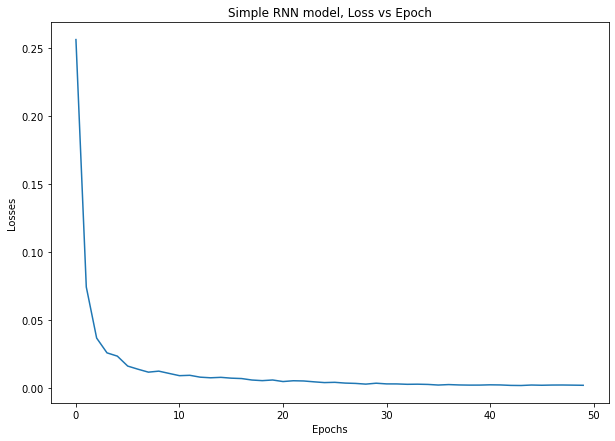

In [41]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

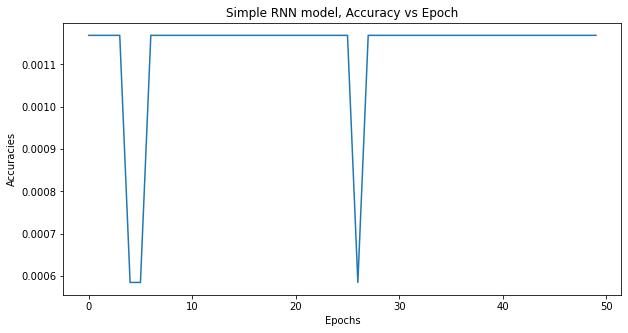

In [42]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data 

In [43]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

(1711, 1)

In [44]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1711, 1)

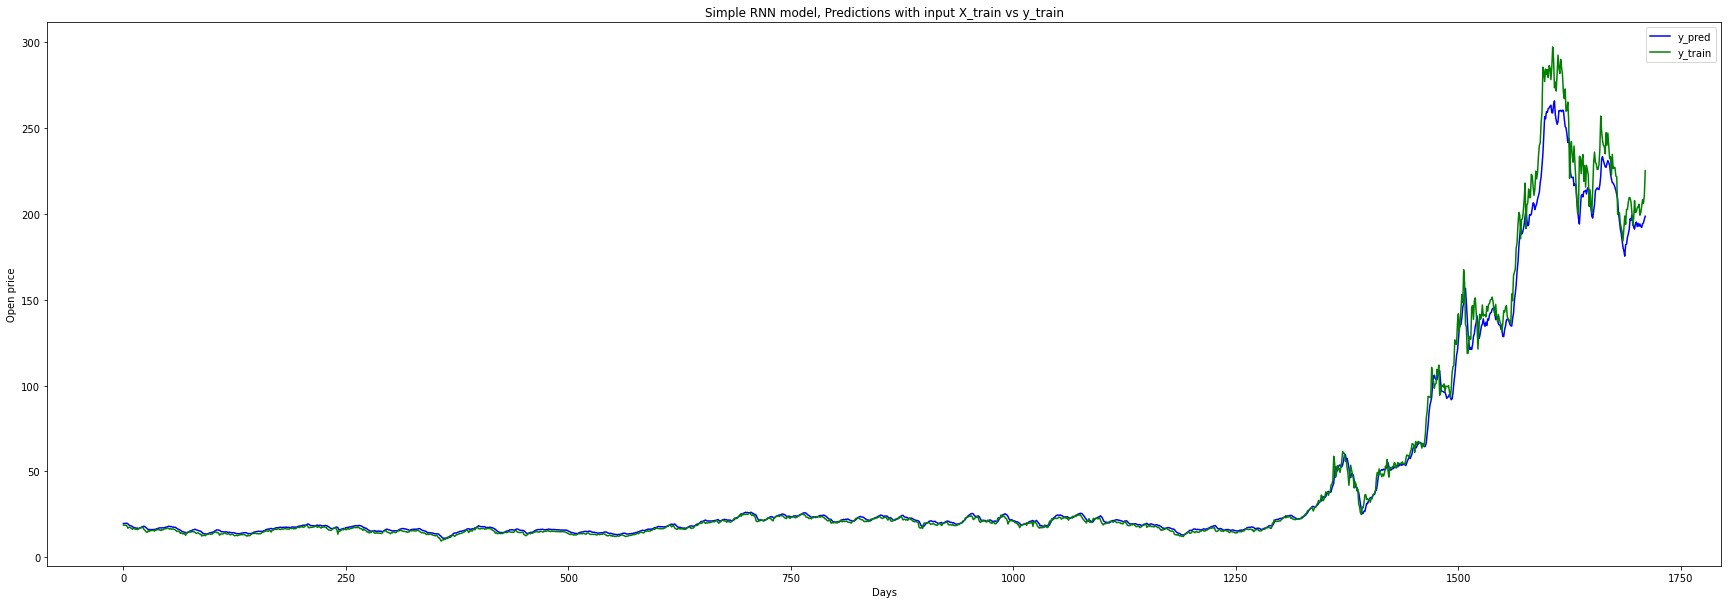

In [45]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


<a id="8"></a>
## 8.Creating Test Dataset from Validation Data 

### Converting array and scaling

In [46]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (755, 1)


### Creating X_test and y_test

In [48]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

### Converting to array

In [49]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [50]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (705, 50)
Shape of y_test before reshape : (705,)


### Reshape

In [51]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [52]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (705, 50, 1)
Shape of y_test after reshape : (705, 1)


<a id="9"></a>
## 9.Evaluating with Validation Data 

In [53]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (705, 1)


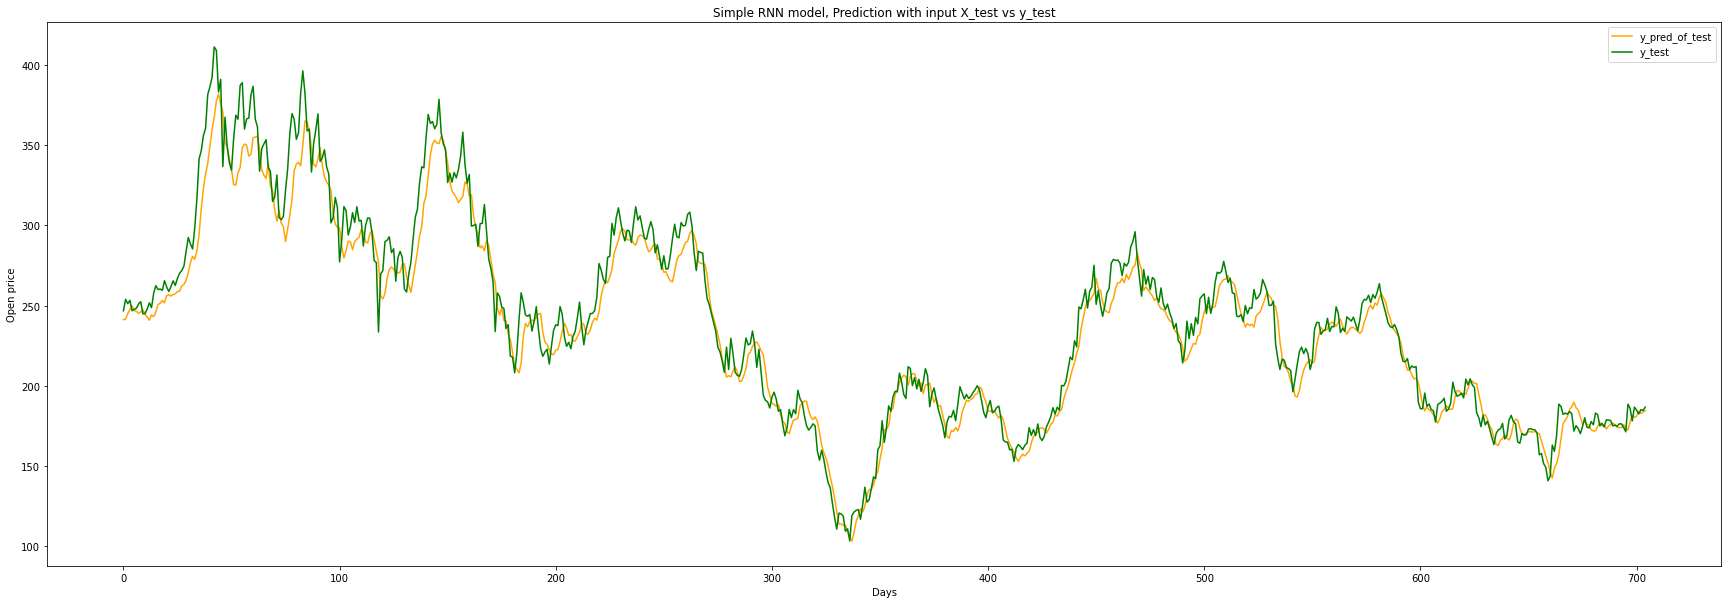

In [54]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

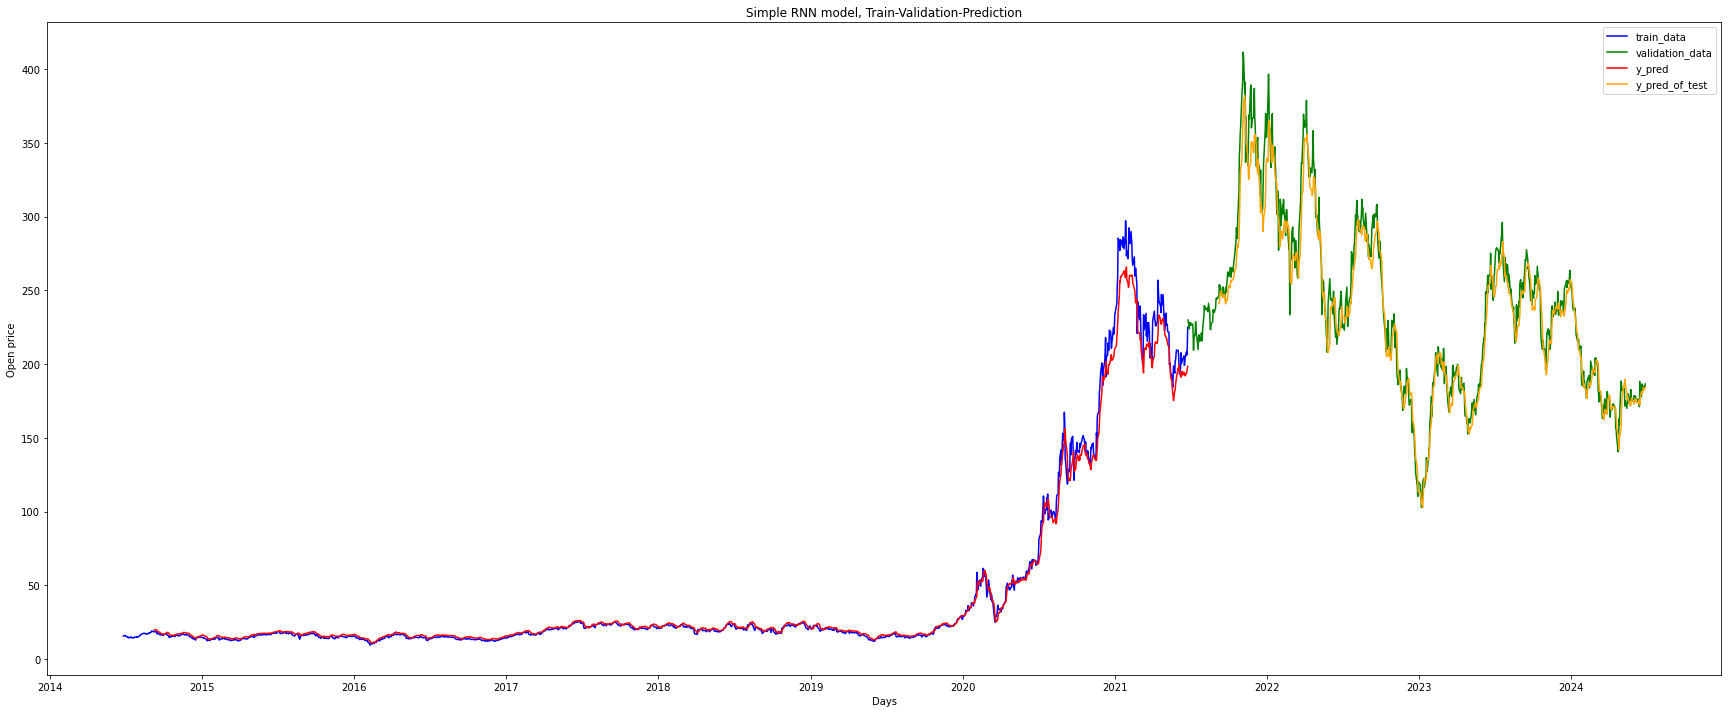

In [55]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

<a id="10"></a>
## 10.Creating LSTM Model

In [56]:
y_train = scaler.fit_transform(y_train)

In [57]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)


Epoch 1/10
172/172 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0012
Epoch 2/10
172/172 [==============================] - 1s 5ms/step - loss: 7.9338e-04 - accuracy: 0.0012
Epoch 3/10
172/172 [==============================] - 1s 6ms/step - loss: 5.7538e-04 - accuracy: 0.0012
Epoch 4/10
172/172 [==============================] - 1s 6ms/step - loss: 3.8706e-04 - accuracy: 0.0012
Epoch 5/10
172/172 [==============================] - 1s 5ms/step - loss: 3.7504e-04 - accuracy: 0.0012
Epoch 6/10
172/172 [==============================] - 1s 5ms/step - loss: 3.8326e-04 - accuracy: 0.0012
Epoch 7/10
172/172 [==============================] - 1s 5ms/step - loss: 3.5513e-04 - accuracy: 0.0012
Epoch 8/10
172/172 [==============================] - 1s 5ms/step - loss: 4.2430e-04 - accuracy: 0.0012
Epoch 9/10
172/172 [==============================] - 1s 5ms/step - loss: 8.1739e-04 - accuracy: 0.0012
Epoch 10/10
172/172 [==============================] - 1s 5ms/step -

<a id="11"></a>
## 11.Evaluating LSTM Model

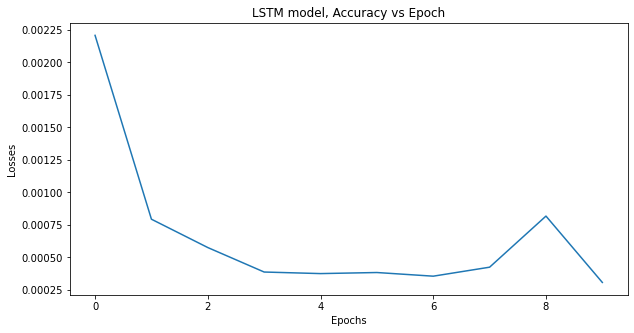

In [58]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

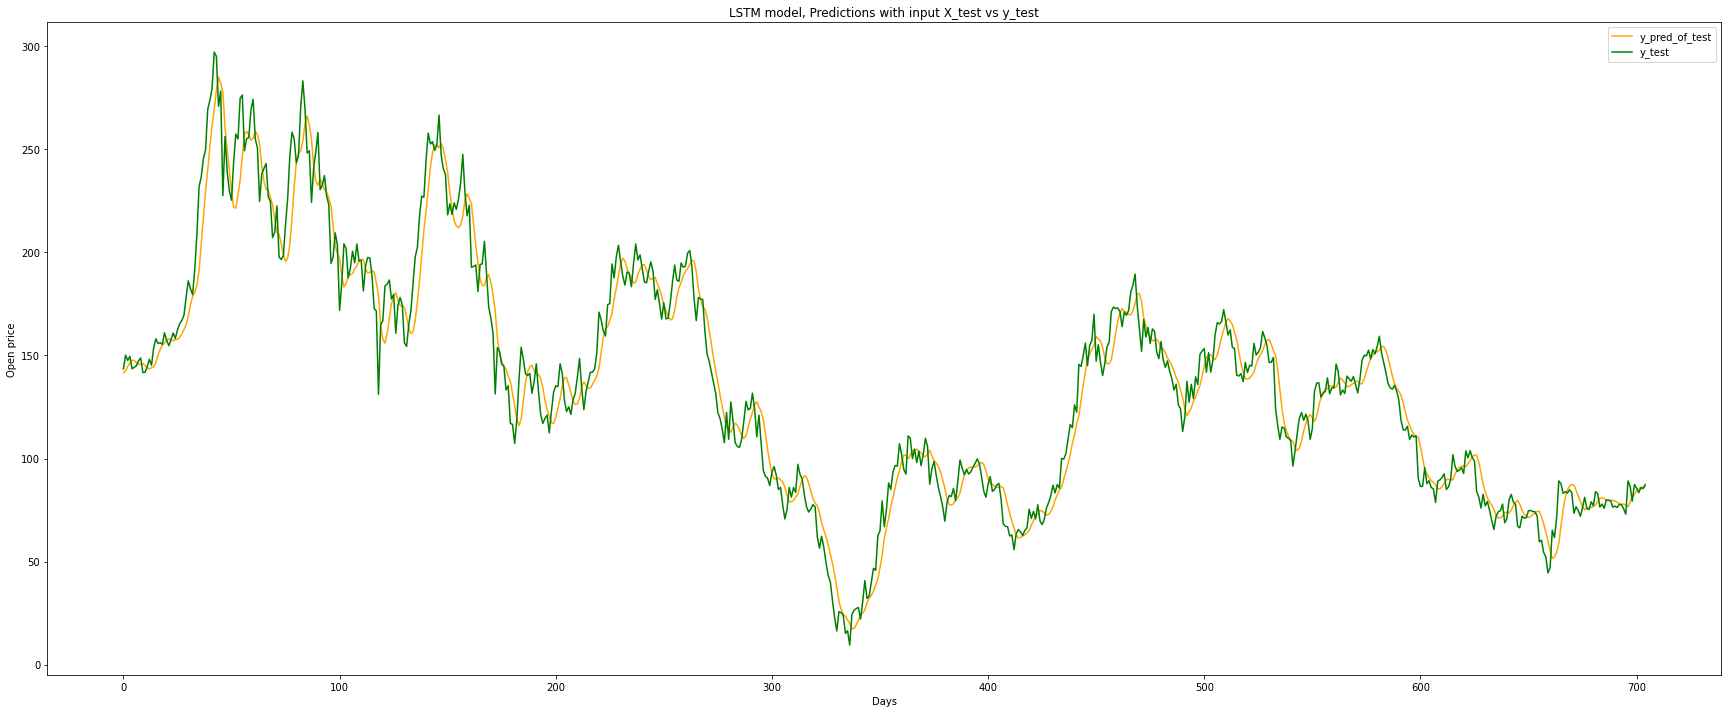

In [59]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

<a id="12"></a>
## 12.Future price prediction

* Which day is the last day in our data?

In [60]:
data.iloc[-1]

Date          6/26/2024
Close/Last       196.37
Volume         95737070
Open             186.54
High             197.76
Low              186.36
Name: 2515, dtype: object

* We can predict the open price for the day after 6/26/2024--> for  6/27/2024.
* We will use last 50 days Open price as input of our model for this prediction
* Let us prepare it:

In [61]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.33806937],
        [0.35687422],
        [0.2233598 ],
        [0.17572085],
        [0.        ],
        [0.05787714],
        [0.46552445],
        [0.38445466],
        [0.59109904],
        [1.        ],
        [0.96991224],
        [0.86585875],
        [0.88382783],
        [0.86794818],
        [0.90346845],
        [0.87421646],
        [0.64834935],
        [0.71980777],
        [0.67885499],
        [0.61512746],
        [0.70915169],
        [0.82198078],
        [0.70079398],
        [0.68930213],
        [0.77308817],
        [0.73025491],
        [0.88361889],
        [0.8616799 ],
        [0.71625575],
        [0.74885081],
        [0.70267447],
        [0.79440033],
        [0.79272879],
        [0.78499791],
        [0.71500209],
        [0.72691183],
        [0.71124112],
        [0.74320936],
        [0.74174676],
        [0.69703301],
        [0.63852904],
        [0.99937317],
        [0.945257  ],
        [0.78061011],
        [0.96113665],
        [0

In [64]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 6/27/2024     :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 6/27/2024 :", LSTM_prediction[0,0])

Simple RNN, Open price prediction for 6/27/2024     : 181.58838
LSTM prediction, Open price prediction for 6/27/2024 : 183.9912
